In [81]:
import os
os.path.isfile('/Users/shalinigarikapati/Desktop/VOICE_RECOG/voice.csv')




True

In [82]:
import pandas as pd
dataset = pd.read_csv('/Users/shalinigarikapati/Desktop/VOICE_RECOG/voice.csv')
X = dataset.iloc[: , :-1].values
y = dataset.iloc[:,20].values






DATA PREPROCESSING

In [ ]:

#preprocessing
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[20,:] = labelencoder.fit_transform(X[20,:])
y = labelencoder.fit_transform(y)

# male = 1,female = 0

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X , y, test_size = 0.75 , random_state = 0)

FEATURE SCALING

In [83]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test= sc_X.transform(X_test)

"""y_train = sc_X.fit_transform(y_train)
y_test= sc_X.transform(y_test)"""



'y_train = sc_X.fit_transform(y_train)\ny_test= sc_X.transform(y_test)'

RANDOMFOREST CLASSIFIER

In [163]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print("Acuuracy of training set:",rf.score(X_train,y_train)*100)



Acuuracy of training set: 99.74747474747475


In [86]:
y_pred_rf = rf.predict(X_test)

In [87]:
y_pred_rf

array([0, 1, 0, ..., 0, 0, 0])

METRICS USED:f1 score,Accuracy Score,Confusion matrix

In [124]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix


print("Accuracy of random forest classifier: {:.2f}%".format(accuracy_score(y_test, y_pred_rf) * 100))
print("\nF1 Score random forest classifier: {:.2f}".format(f1_score(y_test, y_pred_rf) * 100))
print("\nCOnfusion Matrix random forest classifier:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy of random forest classifier: 96.09%

F1 Score random forest classifier: 96.02

COnfusion Matrix random forest classifier:
 [[1160   29]
 [  64 1123]]


Normalized confusion matrix
[[0.98 0.02]
 [0.04 0.96]]


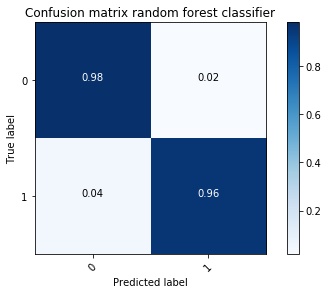

In [125]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix





y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
y_true = np.concatenate((y_train, y_test))
y_pred = np.concatenate((y_train_pred, y_test_pred))

def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm, classes=[0, 1],
                      title='Confusion matrix random forest classifier')
plt.show()

Accuracy given the threshold of the human vocal range

In [106]:
threshold = 270

tpr=[];fpr=[]
for threshold in np.linspace(-1,2,28):
    lp =list(zip(y_test,y_pred))
    TP = sum([l for(l,p)in lp if 1>0 and p>threshold])
    FN =sum([l for (l,p) in lp if 1>0 and p<= threshold])
    TN =sum([l for (l,p) in lp if 1<=0 and p<= threshold])
    FP = sum([l for (l,p)in lp if 1<=0 and p>threshold])
    tpr.append(TP/5)
    fpr.append(FP/5)
    pass
print(tpr)
print("------------------------------")
print(fpr)

[237.4, 237.4, 237.4, 237.4, 237.4, 237.4, 237.4, 237.4, 237.4, 118.4, 118.4, 118.4, 118.4, 118.4, 118.4, 118.4, 118.4, 118.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
------------------------------
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


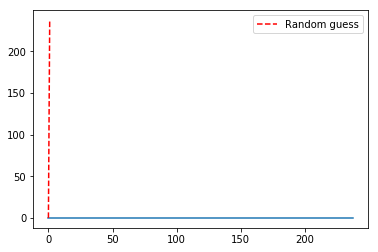

In [103]:
import matplotlib.pyplot as plt
plt.plot(tpr,fpr)
plt.plot((0,max(tpr)), "r--" ,label = "Random guess")
plt.legend();

In [107]:
from sklearn.model_selection import train_test_split
X_train_res,X_test_res,y_train_res,y_test_res = train_test_split(X , y, test_size = 0.75 , random_state = 0)



SHUFFLE SPLIT

In [108]:
from sklearn.model_selection import ShuffleSplit



ss = ShuffleSplit(n_splits=10, test_size=0.2)



    
print("\nAverage accuracy across folds: {:.2f}%".format(sum(accs) / len(accs) * 100))
print("\nAverage F1 score across folds: {:.2f}%".format(sum(f1s) / len(f1s) * 100))
print("\nAverage Confusion Matrix across folds: \n {}".format(sum(cms) / len(cms)))



Average accuracy across folds: 95.62%

Average F1 score across folds: 95.56%

Average Confusion Matrix across folds: 
 [[1154.   35.]
 [  69. 1118.]]


CLASSIFICATION AND REGRESSION TREE

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train,y_train)
score = cross_val_score(reg , X , y , cv = 5)
reg.score(X_train,y_train)
y_pred = reg.predict(X_test)

len(X) == len(y)

True

In [127]:
y_test


array([0, 1, 0, ..., 1, 0, 0])

In [128]:
y_pred

array([0., 1., 0., ..., 0., 0., 0.])

In [ ]:
METRICS

In [129]:
from sklearn.metrics import confusion_matrix


In [130]:
r = confusion_matrix(y_test,y_pred)

In [131]:
print(r)

[[1156   33]
 [  77 1110]]


In [132]:
a=reg.score(X_train,y_train)
#b=reg.score(y_test,y_pred)
print(a)
#print(b)

1.0


In [133]:
accs = []
f1s = []
cms = []


    # Determine test set accuracy and f1 score on this fold using the true y labels and predicted y labels



In [134]:
accs.append(accuracy_score(y_test, y_pred))
f1s.append(f1_score(y_test, y_pred))
cms.append(confusion_matrix(y_test, y_pred))

In [135]:
print("\nAverage accuracy across folds DecisionTreeRegressor : {:.2f}%".format(sum(accs) / len(accs) * 100))
print("\nAverage F1 score across folds DecisionTreeRegressor: {:.2f}%".format(sum(f1s) / len(f1s) * 100))
print("\nAverage Confusion Matrix across folds DecisionTreeRegressor: \n {}".format(sum(cms) / len(cms)))


Average accuracy across folds DecisionTreeRegressor : 95.37%

Average F1 score across folds DecisionTreeRegressor: 95.28%

Average Confusion Matrix across folds DecisionTreeRegressor: 
 [[1156.   33.]
 [  77. 1110.]]


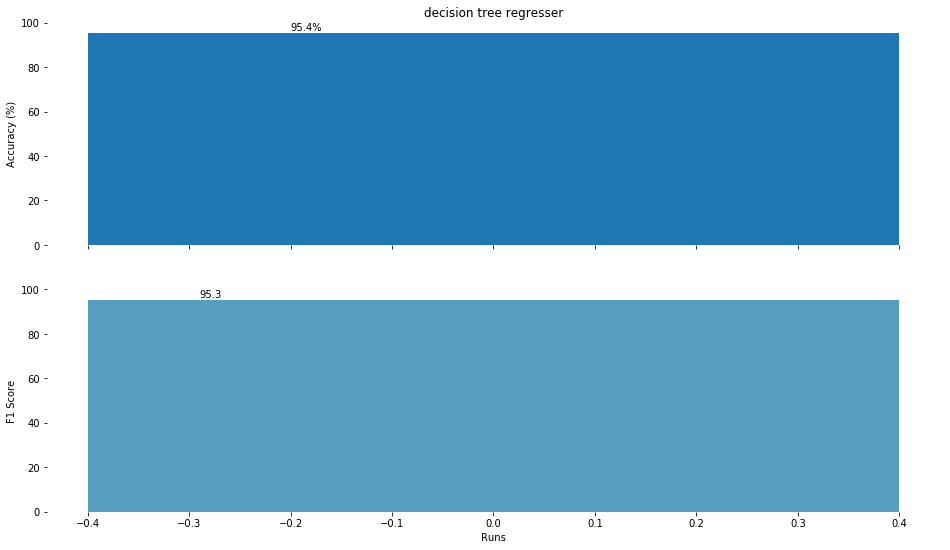

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,9))

acc_scores = [round(a * 100, 1) for a in accs]
f1_scores = [round(f * 100, 1) for f in f1s]

x1 = np.arange(len(acc_scores))
x2 = np.arange(len(f1_scores))

ax1.bar(x1, acc_scores)
ax2.bar(x2, f1_scores, color='#559ebf')

# Place values on top of bars
for i, v in enumerate(list(zip(acc_scores, f1_scores))):
    ax1.text(i - 0.2, v[0] + 1, str(v[0]) + '%')
    ax2.text(i - 0.29, v[1] + 1, str(v[1]))

ax1.set_ylabel('Accuracy (%)')
ax1.set_title('decision tree regresser')
ax1.set_ylim([0, 100])

ax2.set_ylabel('F1 Score')
ax2.set_xlabel('Runs')
ax2.set_ylim([0, 100])

sns.despine(bottom=True, left=True)  # Remove the ticks on axes for cleaner presentation

plt.show()

In [158]:

from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train,y_train)

In [164]:
print("ACCURACY OF TRAINING SET IN LOGISTIC REGRESSION",lreg.score(X_train,y_train)*100)

y_pred_lreg = lreg.predict(X_test)


ACCURACY OF TRAINING SET IN LOGISTIC REGRESSION 97.85353535353535


In [160]:
y_pred_lreg

array([0, 1, 0, ..., 1, 0, 0])

C=1.00
Sparsity with L1 penalty: 15.00%
score with L1 penalty: 0.9785
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.9773
C=0.10
Sparsity with L1 penalty: 60.00%
score with L1 penalty: 0.9785
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.9735
C=0.01
Sparsity with L1 penalty: 90.00%
score with L1 penalty: 0.9785
Sparsity with L2 penalty: 0.00%
score with L2 penalty: 0.9533


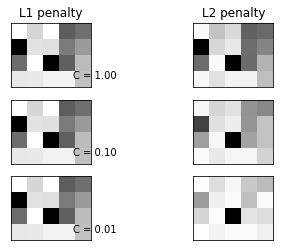

In [167]:
for i, C in enumerate((1, 0.1, 0.01)):
    # turn down tolerance for short training time
    l_reg = LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga')
    l_reg1= LogisticRegression(C=C, penalty='l2', tol=0.01, solver='saga')
    l_reg.fit(X_train, y_train)
    l_reg1.fit(X_train,y_train)
    coef_l1_lreg =l_reg.coef_.ravel()
    coef_l2_lreg1=l_reg1.coef_.ravel()

    # coef_l1_LR contains zeros due to the
    # L1 sparsity inducing norm

    sparsity_l1_LR = np.mean(coef_l1_lreg == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_lreg1 == 0) * 100
    
    print("C=%.2f" % C)
    print("Sparsity with L1 penalty: %.2f%%" % sparsity_l1_LR)
    print("score with L1 penalty: %.4f" % lreg.score(X_train, y_train))
    print("Sparsity with L2 penalty: %.2f%%" % sparsity_l2_LR)
    print("score with L2 penalty: %.4f" % l_reg1.score(X_train, y_train))

    l1_plot = plt.subplot(3, 2, 2 * i + 1)
    l2_plot = plt.subplot(3, 2, 2 * (i + 1))
    if i == 0:
        l1_plot.set_title("L1 penalty")
        l2_plot.set_title("L2 penalty")

    l1_plot.imshow(np.abs(coef_l1_l_reg.reshape(4, 5)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    l2_plot.imshow(np.abs(coef_l2_lreg1.reshape(4, 5)), interpolation='nearest',
                   cmap='binary', vmax=1, vmin=0)
    plt.text(-8, 3, "C = %.2f" % C)

    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l2_plot.set_xticks(())
    l2_plot.set_yticks(())

plt.show()
